# Advertising Sales Channel Prediction

#### Problem Statement:

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

In [1]:
# import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file from dataset
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Here "sales" is the target variable which contains continuous data so it is a regression type problem

Here the dataset contains the data of advertising dollars spent on TV, radio and newspaper and the label contains the sales of a single product in a given market.

In [3]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

#### checking the null values Using heatmap:

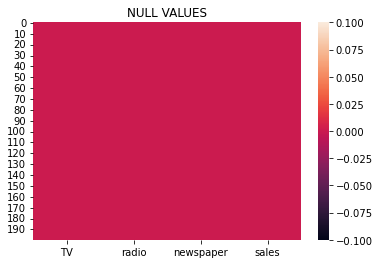

In [10]:
sns.heatmap(df.isnull())
plt.title('NULL VALUES')
plt.show()

so it can be observed that the dataset has no Na values present in the columns

In [11]:
#Summary of dataset
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
# Checking the uniqueness of target variable
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

There are unique values present in the target variable.

In [13]:
# Checking whether the dataset contains any space
df.loc[df['sales']==" "]

,TV,radio,newspaper,sales


So from the above observation we can say there are no spaces present in the dataset.

### Exploration of Data & Visualization:

In [14]:
# Checking number of unique values in all the columns 
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

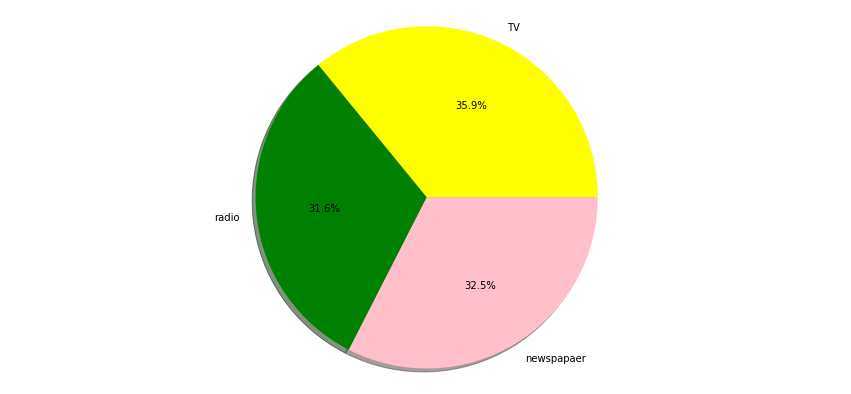

In [18]:
labels = 'TV','radio','newspapaer'
sizes = [190,167,172]
colors = ['yellow','green','pink']

#ploting pie chart
plt.figure(figsize=(15,7))
plt.pie(sizes,labels=labels,colors = colors,
        autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.show()

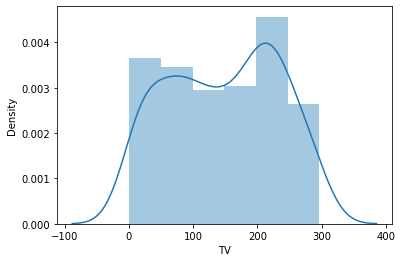

In [20]:
# Checking how the data is distributed in the column TV
sns.distplot(df["TV"])
plt.show()

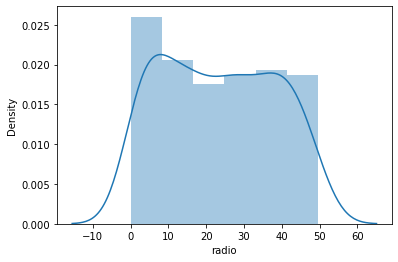

In [21]:
# Checking how the data is distributed in the column radio
sns.distplot(df["radio"])
plt.show()

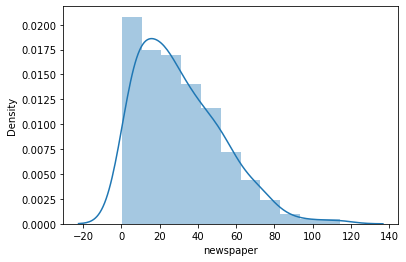

In [22]:
# Checking how the data is distributed in the column newspaper
sns.distplot(df["newspaper"])
plt.show()

Here the data in the newpaper feature contains left skewness.

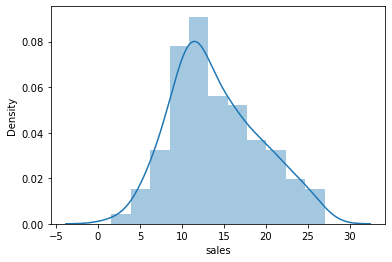

In [23]:
# Checking how the data is distributed in the target variable sales
sns.distplot(df["sales"])
plt.show()

From the above plotting analysis we can say that the data in the columns are almost normally distributed and some columns contains skewness. So we will treat this skewness later.

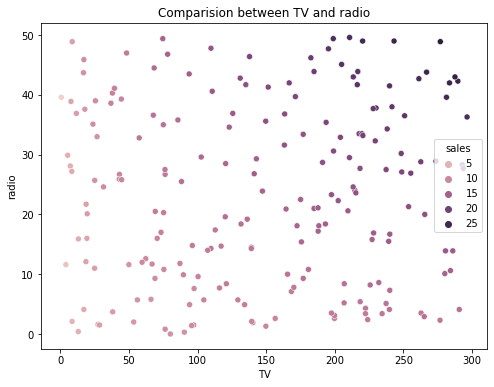

In [26]:
# Checking the relation between TV and radio on the basis of sales
plt.figure(figsize=[8,6])
plt.title('Comparision between TV and radio')
sns.scatterplot(df['TV'],df['radio'],hue=df["sales"])
plt.show()

Here we can see the data is scattered so there is no linear relationship while comparing TV and radio.

As we can see from the plot, if we spend 5 to 15 dollars(say) then we dont get any sales from both TV and radio .But if we spend more money than this then we can see the increment in the sales.

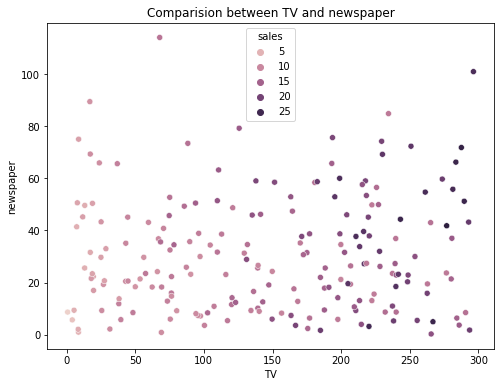

In [31]:
# Checking the relation between TV and newspaper on the basis of sales
plt.figure(figsize=[8,6])
plt.title('Comparision between TV and newspaper')
sns.scatterplot(df['TV'],df['newspaper'],hue=df["sales"])
plt.show()

This is the comparision between the TV and newspaper on the basis of sales. There is no linear relationship between these features.if we spend 5 to 15 dollars(say) then we dont get any sales from both TV and newspaper .But if we spend more money than this then we can see the increment in the sales.

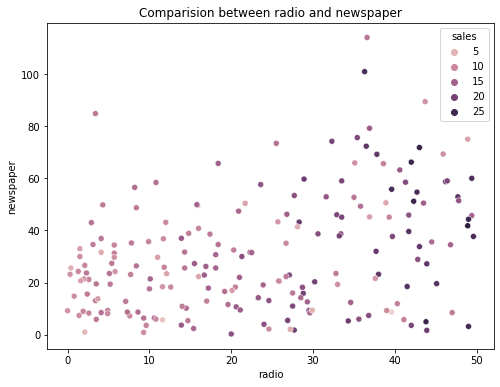

In [32]:
# Checking the relation between radio and newspaper on the basis of sales
plt.figure(figsize=[8,6])
plt.title('Comparision between radio and newspaper')
sns.scatterplot(df['radio'],df['newspaper'],hue=df["sales"])
plt.show()

This is the comparision between the radio and newspaper on the basis of sales. There is no linear relationship between these features.

From the above plots we can notice, if we invest more money then we get more sales in all the platforms.

### Now let's see the relationship between the features and label.

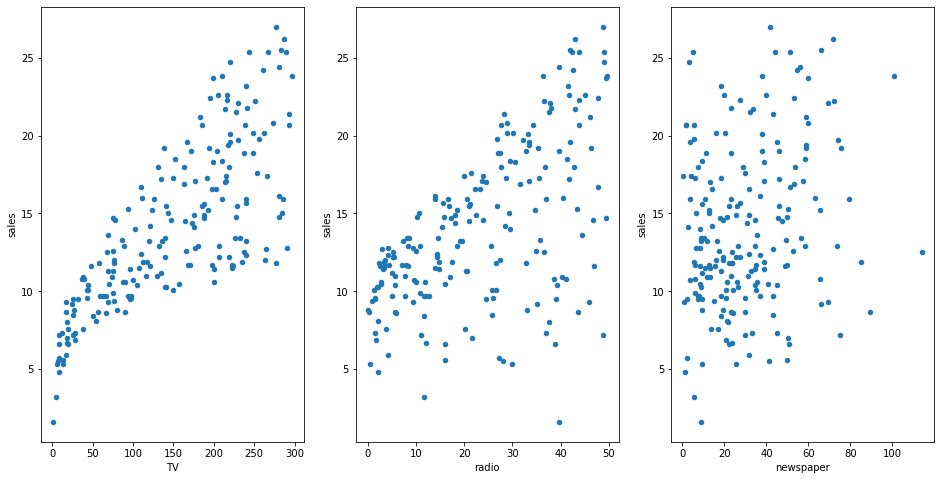

In [33]:
# visualise the relationship between features and response using scatterplots
fig,axs = plt.subplots(1,3)
df.plot(kind = 'scatter',x = 'TV',y = 'sales',ax =axs[0],figsize = (16,8))
df.plot(kind = 'scatter',x = 'radio',y = 'sales',ax = axs[1])
df.plot(kind = 'scatter',x = 'newspaper',y = 'sales',ax = axs[2])
fig.savefig('testdata.jpg')

From the above graphs, it can be observed that there seems to be a linear relationship between the features TV, Radio with the sales.

TV vs sales We can notice the linear relation between TV and sales. This means if we increase our investment in advertising the product on TV then there is an improvemnt in our sales and getting upto 80 to 85% profit too. Which means there is a positive linear relationship.

Radio vs sales Here also we can observe the linear relationship between radio and sales. This means if we invest in advertising the product on radio then also we can get a profit in our sales but not more as TV. And we can say we are getting 45 to 50% profit. But there is no loss in advertising on radio.

Newspaper vs sales In case of newspaper there is no relationship with sales which means advertising the product on newspaper will not improve our sales also we get more loss by investing money on newspaper. So we can say may be newspaper is not the best platform to invest the money. But we cannot conclude on this basis of this,we will move further and analyze it.

## Correlation Analysis

In [34]:
cor = df.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map

## Correlation using the heatmap

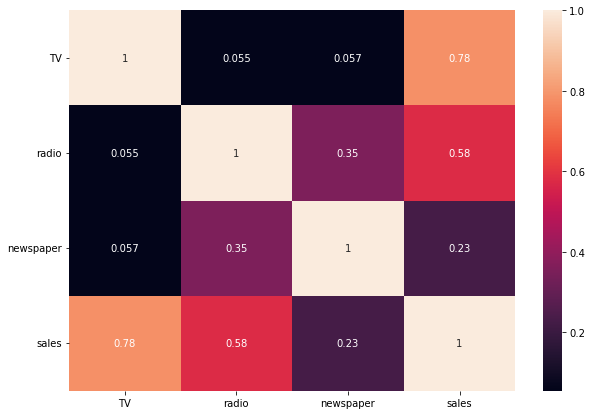

In [41]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot = True)
plt.yticks(rotation=0)
plt.show()

The heat map contains only positive correlation.

We can observe the target variable sales are highly correlated with TV. sales are moderately correlated with radio. sales are less correlated with newspaper. There is a less correlation between TV and newspaper and TV and radio. We can also see there is no high correlation between feature to feature which means there is no multicollinearity problem.

In [42]:
cor['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

# Visualizing the correlation between label and features using bar plot

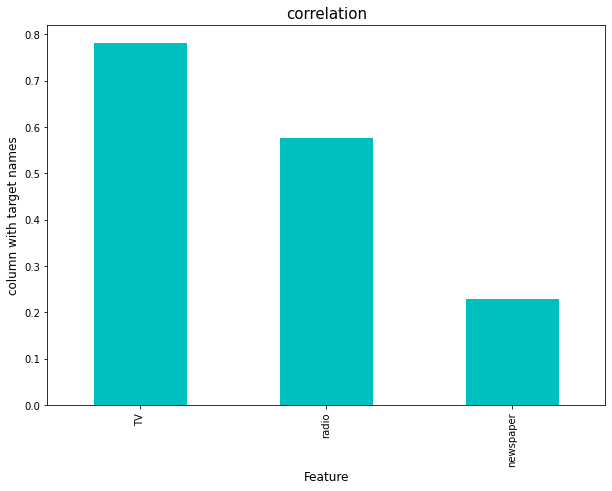

In [44]:
plt.figure(figsize=(10,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=12)
plt.ylabel('column with target names',fontsize=12)
plt.title('correlation',fontsize=15)
plt.show()

Here we can easily observe the correlation as sales are highly correlated with TV, moderately correlated with radio and less correlated with newspaper.

# Identifying the outliers

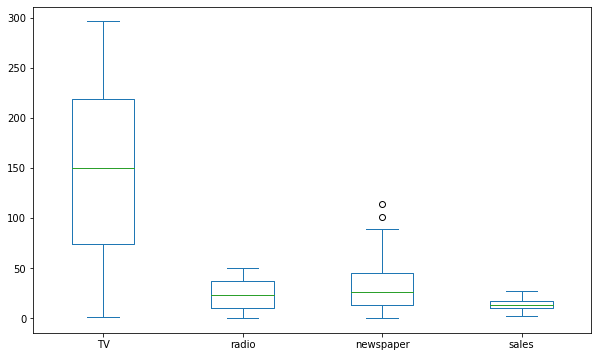

In [45]:
df.plot(kind="box", figsize = (10,6))
plt.show()

We can see that there are outliers present only in newpaper of the boxplot. Let's remove those outliers.

## Removing outliers
#### 1. Zscore method

In [47]:
variables = df[["newspaper"]]

In [48]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(variables))

# Creating new dataframe
new_df=df[(z<3).all(axis=1)]
new_df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


This is the new dataframe after removing the outliers.

In [49]:
df.shape

(200, 4)

The original dataset contains 200 rows and 4 columns.

In [50]:
new_df.shape

(198, 4)

The new dataframe contains 198 rows and 4 columns.

In [51]:
# Let's check the the data loss
data_loss = (200-198)/200*100
data_loss

1.0

There is only 1% data loss. Here I am not losing more data so I am removing the outliers.

## Checking for skewness

In [52]:
# Checking the skewness
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Skewness threshold is taken as +/- 0.65.

Only newspaper has skewness, let's remove the skewness.

## Removing Skewness using Power Transform Method

In [53]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [55]:
feature = ["newspaper"]
new_df[feature] = scaler.fit_transform(new_df[feature].values)
new_df[feature]

,newspaper
0,1.604196
1,0.831044
2,1.607052
3,1.283768
4,1.280622
...,...
195,-0.687435
196,-1.146090
197,-1.314437
198,1.517395


In [56]:
# Now let's check the skewness after applying yeo-johnson method.
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

We can see the skewness has been removed. Now let's visualize it by using distplot.

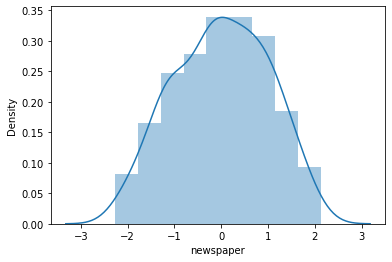

In [58]:
# After removing let's check how the data has been distributed in each column.
sns.distplot(new_df["newspaper"])
plt.show()

In [59]:
# cleaned dataset
new_df

,TV,radio,newspaper,sales
0,230.1,37.8,1.604196,22.1
1,44.5,39.3,0.831044,10.4
2,17.2,45.9,1.607052,9.3
3,151.5,41.3,1.283768,18.5
4,180.8,10.8,1.280622,12.9
...,...,...,...,...
195,38.2,3.7,-0.687435,7.6
196,94.2,4.9,-1.146090,9.7
197,177.0,9.3,-1.314437,12.8
198,283.6,42.0,1.517395,25.5


## Data Preprocessing
#### Separating the independent and target variables into x and y

In [60]:
x = new_df.drop("sales", axis=1)
y = new_df["sales"]

In [61]:
# dataset containing only features
x

,TV,radio,newspaper
0,230.1,37.8,1.604196
1,44.5,39.3,0.831044
2,17.2,45.9,1.607052
3,151.5,41.3,1.283768
4,180.8,10.8,1.280622
...,...,...,...
195,38.2,3.7,-0.687435
196,94.2,4.9,-1.146090
197,177.0,9.3,-1.314437
198,283.6,42.0,1.517395


## Scaling data with standard scaler

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,TV,radio,newspaper
0,0.978697,0.989521,1.604196
1,-1.199012,1.090705,0.831044
2,-1.519332,1.535913,1.607052
3,0.056456,1.225616,1.283768
4,0.400243,-0.831784,1.280622
...,...,...,...
193,-1.272932,-1.310720,-0.687435
194,-0.615864,-1.229773,-1.146090
195,0.355657,-0.932968,-1.314437
196,1.606431,1.272836,1.517395


This is our scaled data using standard scaler.

## creating the Model for the predictions

### Finding best random state

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [67]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_state ",maxRS)

Maximum r2 score is  0.9440953301664556 on Random_state  90


So, here getting the maximum r2 score as 94% on the random state 90.

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state = maxRS)

## Importing all the Regression Algorithms

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [72]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))

R2_score: 0.9358346827439895
Mean abs error: 1.029386786308399
Mean squared error: 1.579629622636132


The R2 score using Linear Regressor is 93%.

## Random Forest Regressor

In [76]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=200, random_state=90)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))

R2_Score: 0.9739854190521797
Mean abs error: 0.6575999999999994
Mean squared error: 0.6404301333333344


The R2 score using Random Forest Regressor is 97%.

## KNN Regressor

In [78]:
# Checking R2 score for KNN regressor
knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))

R2_Score: 0.925394255631917
Mean abs error: 0.9446666666666669
Mean squared error: 1.836653333333334


The R2 score using KNN Regressor is 92%.

## Stochastic Gradient Descent Regressor

In [79]:
# Checking R2 score for SGD Regressor
SGD=SGDRegressor(epsilon=1, max_iter=500, alpha=0.001,fit_intercept=True)
SGD.fit(x_train,y_train)

#prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('Mean abs error:',mean_absolute_error(y_test, predSGD))
print('Mean squared error:',mean_squared_error(y_test, predSGD))

R2_Score: 0.9347043314023515
Mean abs error: 1.0443221028241505
Mean squared error: 1.6074567501186279


The R2 score using SGD Regressor is 93%

Thus we have good accuracy on mostly all the models but there might be chances that the data are overfitted while training so for removing the Over fitting we have to use cross validation.

## Checking the cross validation score

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
# Checking cv score for Linear Regression
print('The CV score  for Linear_regression is :',cross_val_score(LR,x,y,cv=5).mean())

The CV score  for Linear_regression is : 0.8857739370001966


In [83]:
# Checking cv score for Random Forest Regression
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=5).mean())

The CV  score for  the Random forest regressor is: 0.9762913126087363


In [84]:
# Checking cv score for KNN Regression
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=5).mean())

The CV score  for  the KNN regressor is : 0.9342426712595204


In [86]:
# Checking cv score for SGD Regression
print('The  CV score for the SGD  regressor is :',cross_val_score(SGD,x,y,cv=5).mean())

The  CV score for the SGD  regressor is : 0.8863292373706756


From the above observation, the difference between R2 score and the cross validation score we conclude that Random Forest Regressor is our best fitting model

In [88]:
score= pd.DataFrame({'CV_RFR':0.9762913126087363, 'R2_score_RFR': 0.9739854190521797}, index=['0'])
score

,CV_RFR,R2_score_RFR
0,0.976291,0.973985


# Hyperparameter tuning

In [89]:
from sklearn.model_selection import GridSearchCV

In [93]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,400],
             'max_depth':[2,4,6,7,8]}

In [94]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [95]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 400]})

In [96]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 400}

In [97]:
Add_sales = RandomForestRegressor(criterion='mae', max_depth=7, max_features='auto', n_estimators=400)
Add_sales.fit(x_train, y_train)
pred_GCV = Add_sales.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_GCV)*100)

R2_Score: 97.35146343468291


After tuning the model Random Forest Regressor, we are getting R2 score as 97% which is good.

# Saving the model

In [99]:
import joblib

joblib.dump(Add_sales,'Advertising_Sales_Channel_Prediction.pkl')

['Advertising_Sales_Channel_Prediction.pkl']

# Conclusion & prediction by the final model

In [100]:
import numpy as np
a = np.array(y_test)
predicted = np.array(RFR.predict(x_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_com

,Original,Predicted
0,18.0,17.6800
1,5.6,6.3080
2,22.3,23.4225
3,19.6,19.8625
4,16.6,15.8840
5,22.2,21.0485
6,21.5,20.8015
7,13.2,12.6610
8,22.4,22.9390
9,8.8,8.4085
